<a href="https://colab.research.google.com/github/JoshFowlkes/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/Josh_Fowlkes_LS_DS_113_Making_Data_backed_Assertions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science - Making Data-backed Assertions

This is, for many, the main point of data science - to create and support reasoned arguments based on evidence. It's not a topic to master in a day, but it is worth some focused time thinking about and structuring your approach to it.

## Lecture - generating a confounding variable

The prewatch material told a story about a hypothetical health condition where both the drug usage and overall health outcome were related to gender - thus making gender a confounding variable, obfuscating the possible relationship between the drug and the outcome.

Let's use Python to generate data that actually behaves in this fashion!

X Variable:
* predictor
* explanatory variable
* feature
* independent variable

Y Variable:
* predicted variable
* explained variable
* target
* dependent variable


In [80]:
import random
dir(random)  # Reminding ourselves what we can do here

['BPF',
 'LOG4',
 'NV_MAGICCONST',
 'RECIP_BPF',
 'Random',
 'SG_MAGICCONST',
 'SystemRandom',
 'TWOPI',
 '_BuiltinMethodType',
 '_MethodType',
 '_Sequence',
 '_Set',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_acos',
 '_bisect',
 '_ceil',
 '_cos',
 '_e',
 '_exp',
 '_inst',
 '_itertools',
 '_log',
 '_pi',
 '_random',
 '_sha512',
 '_sin',
 '_sqrt',
 '_test',
 '_test_generator',
 '_urandom',
 '_warn',
 'betavariate',
 'choice',
 'choices',
 'expovariate',
 'gammavariate',
 'gauss',
 'getrandbits',
 'getstate',
 'lognormvariate',
 'normalvariate',
 'paretovariate',
 'randint',
 'random',
 'randrange',
 'sample',
 'seed',
 'setstate',
 'shuffle',
 'triangular',
 'uniform',
 'vonmisesvariate',
 'weibullvariate']

In [81]:
# Let's think of another scenario:
# We work for a company that sells accessories for mobile phones.
# They have an ecommerce site, and we are supposed to analyze logs
# to determine what sort of usage is related to purchases, and thus guide
# website development to encourage higher conversion.

# The hypothesis - users who spend longer on the site tend
# to spend more. Seems reasonable, no?

# But there's a confounding variable! If they're on a phone, they:
# a) Spend less time on the site, but
# b) Are more likely to be interested in the actual products!

# Let's use namedtuple to represent our data

from collections import namedtuple
# purchased and mobile are bools, time_on_site in seconds
User = namedtuple('User', ['purchased','time_on_site', 'mobile'])

example_user = User(True, 69, True)
print(example_user)

User(purchased=True, time_on_site=69, mobile=True)


In [82]:
# And now let's generate 1000 example users
# 750 mobile, 250 not (i.e. desktop)
# A desktop user has a base conversion likelihood of 10%
# And it goes up by 1% for each 15 seconds they spend on the site
# And they spend anywhere from 10 seconds to 10 minutes on the site (uniform)
# Mobile users spend on average half as much time on the site as desktop
# But have three times as much base likelihood of buying something

users = []

for _ in range(2500):
  # Desktop users
  time_on_site = random.uniform(10, 600)
  purchased = random.random() < 0.1 + (time_on_site / 1500) # 10% likelyhood of buying
  users.append(User(purchased, time_on_site, False)) # increases +1% every 15 seconds on site
  
  
for _ in range(7500):
  # Mobile users
  time_on_site = random.uniform(5, 300)
  purchased = random.random() < 0.3 + (time_on_site / 1500)
  users.append(User(purchased, time_on_site, True))
  
random.shuffle(users)
print(users[:10])

[User(purchased=False, time_on_site=246.6017608766788, mobile=False), User(purchased=True, time_on_site=289.9373016206247, mobile=True), User(purchased=False, time_on_site=115.19409209360327, mobile=True), User(purchased=False, time_on_site=60.89178296472128, mobile=True), User(purchased=False, time_on_site=313.2667363430682, mobile=False), User(purchased=False, time_on_site=168.06090211337548, mobile=False), User(purchased=False, time_on_site=69.51802222812618, mobile=True), User(purchased=False, time_on_site=177.09378100914344, mobile=True), User(purchased=False, time_on_site=229.73949857650132, mobile=True), User(purchased=False, time_on_site=132.4722524103285, mobile=True)]


In [83]:
# downgrading pandas version, since new one messes up code
!pip freeze

absl-py==0.7.1
alabaster==0.7.12
albumentations==0.1.12
altair==3.1.0
astor==0.8.0
astropy==3.0.5
atari-py==0.1.15
atomicwrites==1.3.0
attrs==19.1.0
audioread==2.1.8
autograd==1.2
Babel==2.7.0
backcall==0.1.0
backports.tempfile==1.0
backports.weakref==1.0.post1
beautifulsoup4==4.6.3
bleach==3.1.0
blis==0.2.4
bokeh==1.0.4
boto==2.49.0
boto3==1.9.180
botocore==1.12.180
Bottleneck==1.2.1
branca==0.3.1
bs4==0.0.1
bz2file==0.98
cachetools==3.1.1
certifi==2019.6.16
cffi==1.12.3
chainer==5.4.0
chardet==3.0.4
Click==7.0
cloudpickle==0.6.1
cmake==3.12.0
colorlover==0.3.0
community==1.0.0b1
contextlib2==0.5.5
convertdate==2.1.3
coverage==3.7.1
coveralls==0.5
crcmod==1.7
cufflinks==0.14.6
cvxopt==1.2.3
cvxpy==1.0.15
cycler==0.10.0
cymem==2.0.2
Cython==0.29.10
daft==0.0.4
dask==1.1.5
dataclasses==0.6
datascience==0.10.6
decorator==4.4.0
defusedxml==0.6.0
descartes==1.1.0
dill==0.3.0
distributed==1.25.3
Django==2.2.2
dlib==19.16.0
dm-sonnet==1.33
docopt==0.6.2
docutils==0.14
dopamine-rl==1.0.5
easy

In [84]:
# so with pip freeze, we see we have pandas .24.2 whereas we need .23.4

# the way to downgrade:
!pip install pandas==0.23.4


# alternatively you can use pd.__version__

In [85]:
# Let's put this in a dataframe so we can look at it more easily
import pandas as pd
user_data = pd.DataFrame(users)
user_data.head()

,purchased,time_on_site,mobile
0,False,246.601761,False
1,True,289.937302,True
2,False,115.194092,True
3,False,60.891783,True
4,False,313.266736,False


In [86]:
# Let's use crosstabulation to try to see what's going on
pd.crosstab(user_data['purchased'], user_data['time_on_site'])

time_on_site,5.067812086070401,5.155960799324065,5.156037116748046,5.181201395571875,5.220779922609563,5.231043105658615,5.335954910394119,5.431036982411602,5.453224421827749,5.475754813263142,5.48892978670173,5.4972216418345745,5.562088873052778,5.571393105656822,5.672358756224215,5.709525830725644,5.803675129015896,5.857347842002254,5.87152764010337,5.872511536373408,5.905142357487601,5.917011849318627,5.977529703305714,6.077642692021426,6.102512348678076,6.116005413914335,6.152280050322323,6.156059975671223,6.174309545424476,6.191374371835158,6.195351363660841,6.246520213686107,6.269610197600883,6.316244493368409,6.341799741203237,6.387373216179847,6.416630414892603,6.590167607461946,6.62643002698367,6.649940157336571,...,591.2182493093027,591.6292379470771,591.798083556055,591.8121896469017,591.8285304611189,591.9672693045537,592.0731756836045,592.4652564212562,592.4786583013614,593.1265599827352,593.3741829621395,593.7806324214592,594.6539171720034,594.7297244878912,594.8540877362492,595.1012061266543,595.5918423733305,595.9649402245847,596.0645236392819,596.359267232923,596.4109433526596,596.477469524755,596.6250289518815,596.8724333655869,597.5135953859508,597.7285437286973,598.2408457422218,598.26761424024,598.3626116071881,598.4080664201675,598.5487112909514,598.7257552912688,599.0102325643442,599.0409262051119,599.3044127256103,599.3416338561154,599.3650309422866,599.7799003375919,599.8953703869213,599.9592313530289
purchased,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
False,0,0,0,1,1,1,0,1,0,0,0,0,0,0,1,0,1,1,0,1,1,1,1,0,1,0,0,1,1,1,1,1,1,1,1,1,0,1,0,1,...,0,0,1,1,1,0,0,1,1,1,1,0,1,0,0,1,1,1,0,1,1,1,1,0,1,1,1,1,1,0,0,1,0,1,1,0,0,1,1,1
True,1,1,1,0,0,0,1,0,1,1,1,1,1,1,0,1,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,...,1,1,0,0,0,1,1,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,1,1,0,0,0


In [87]:
# OK, that's not quite what we want
# Time is continuous! We need to put it in discrete buckets
# Pandas calls these bins, and pandas.cut helps make them

time_bins = pd.cut(user_data['time_on_site'], 6)  # 5 equal-sized bins
pd.crosstab(user_data['purchased'], time_bins)

time_on_site,"(4.473, 104.216]","(104.216, 203.365]","(203.365, 302.514]","(302.514, 401.662]","(401.662, 500.811]","(500.811, 599.959]"
purchased,,,,,,
False,1953,1875,1626,272,239,228
True,915,1128,1259,145,169,191


In [88]:
# We can make this a bit clearer by normalizing (getting %)
pd.crosstab(user_data['purchased'], time_bins, normalize='columns')

# these brackets below have the inclusive and non inclusive notation

time_on_site,"(4.473, 104.216]","(104.216, 203.365]","(203.365, 302.514]","(302.514, 401.662]","(401.662, 500.811]","(500.811, 599.959]"
purchased,,,,,,
False,0.680962,0.624376,0.563605,0.652278,0.585784,0.544153
True,0.319038,0.375624,0.436395,0.347722,0.414216,0.455847


In [89]:
# That seems counter to our hypothesis
# More time on the site can actually have fewer purchases

# But we know why, since we generated the data!
# Let's look at mobile and purchased
pd.crosstab(user_data['purchased'], user_data['mobile'], normalize='columns')

mobile,False,True
purchased,,
False,0.6916,0.5952
True,0.3084,0.4048


In [90]:
# Yep, mobile users are more likely to buy things
# But we're still not seeing the *whole* story until we look at all 3 at once

# Live/stretch goal - how can we do that?

ct = pd.crosstab(user_data['mobile'], [user_data['purchased'], time_bins], normalize='index')

ct

purchased               False        ...                      True 
time_on_site (4.473, 104.216]        ...         (500.811, 599.959]
mobile                               ...                           
False                0.143200        ...                     0.0764
True                 0.212667        ...                     0.0000

[2 rows x 12 columns]

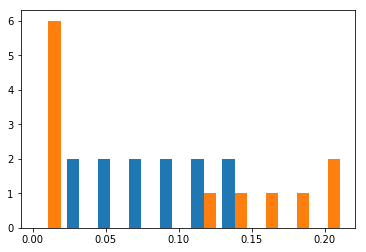

In [91]:
import matplotlib.pyplot as plt
plt.hist(ct);

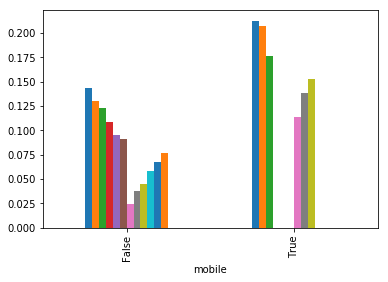

In [92]:
ct.plot(kind='bar', legend=False);

# the goal of assignment is to get this to be understandle at a glance

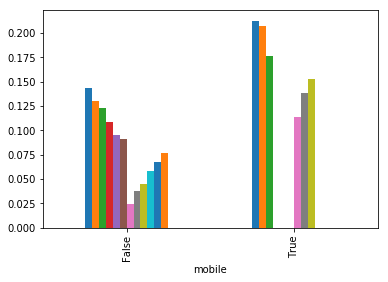

In [93]:
ct = pd.crosstab(user_data['mobile'], [user_data['purchased'], time_bins], normalize='index')

ct.plot(kind='bar', legend=False)

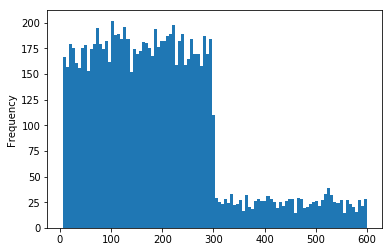

In [94]:
user_data['time_on_site'].plot.hist(bins=100);

In [95]:
user_data[user_data['mobile']==False]

,purchased,time_on_site,mobile
0,False,246.601761,False
4,False,313.266736,False
5,False,168.060902,False
10,True,454.707064,False
11,True,134.224261,False
12,True,525.721483,False
14,False,179.826155,False
15,True,167.916266,False
22,False,281.117656,False
27,True,519.407080,False


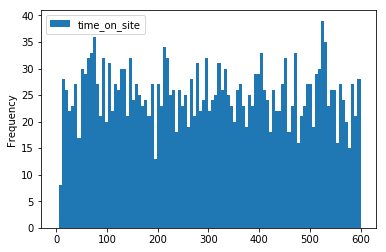

In [96]:
user_data[user_data['mobile']==False].plot.hist(bins=100);

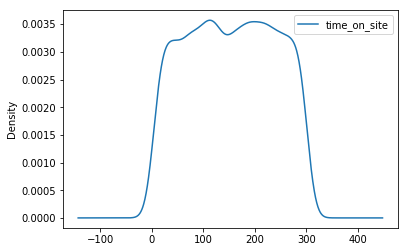

In [97]:
user_data[user_data['mobile']==True].plot.density();

In [98]:
# pivot table
# similiar to cross tab

pt = pd.pivot_table(user_data, values='purchased', index=time_bins)
pt

,purchased
time_on_site,
"(4.473, 104.216]",0.319038
"(104.216, 203.365]",0.375624
"(203.365, 302.514]",0.436395
"(302.514, 401.662]",0.347722
"(401.662, 500.811]",0.414216
"(500.811, 599.959]",0.455847


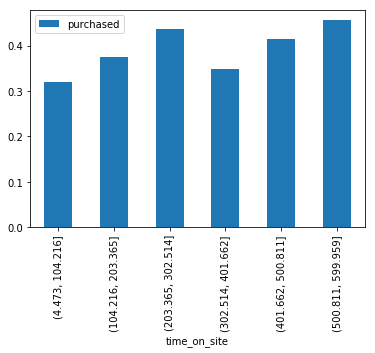

In [99]:

pt.plot.bar();

## Assignment - what's going on here?

Consider the data in `persons.csv` (already prepared for you, in the repo for the week). It has four columns - a unique id, followed by age (in years), weight (in lbs), and exercise time (in minutes/week) of 1200 (hypothetical) people.

Try to figure out which variables are possibly related to each other, and which may be confounding relationships.

In [165]:
# TODO - your code here
# Use what we did live in lecture as an example

# HINT - you can find the raw URL on GitHub and potentially use that
# to load the data with read_csv, or you can upload it yourself

# use seaborn, pandas, or matplotlib primarily for visualiztion today 

df = pd.read_csv('https://raw.githubusercontent.com/LambdaSchool/DS-Unit-1-Sprint-1-Dealing-With-Data/master/module3-databackedassertions/persons.csv') #, usecols = ['age', 'weight', 'exercise_time'])
df.head(10)

,Unnamed: 0,age,weight,exercise_time
0,0,44,118,192
1,1,41,161,35
2,2,46,128,220
3,3,39,216,57
4,4,28,116,182
5,5,58,103,165
6,6,55,161,107
7,7,21,188,37
8,8,55,216,79
9,9,50,127,267


In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [0]:
# putting each category into bins of equal size, 6 of them 
weight_bins = pd.cut(df['weight'], 5)
age_bins = pd.cut(df['age'],5)
exercise_time_bins = pd.cut(df['exercise_time'],5)

In [151]:
# cross tab of exercise time and weight
weight_and_exercise = pd.crosstab(weight_bins, exercise_time_bins)
weight_and_exercise

exercise_time,"(-0.3, 60.0]","(60.0, 120.0]","(120.0, 180.0]","(180.0, 240.0]","(240.0, 300.0]"
weight,,,,,
"(99.854, 129.2]",53,65,71,79,107
"(129.2, 158.4]",44,76,67,74,74
"(158.4, 187.6]",61,93,56,38,10
"(187.6, 216.8]",76,73,29,1,0
"(216.8, 246.0]",44,9,0,0,0


In [152]:
# cross tab of weight and exercise time in %
pd.crosstab(weight_bins, exercise_time_bins, normalize='columns')

exercise_time,"(-0.3, 60.0]","(60.0, 120.0]","(120.0, 180.0]","(180.0, 240.0]","(240.0, 300.0]"
weight,,,,,
"(99.854, 129.2]",0.190647,0.205696,0.318386,0.411458,0.560209
"(129.2, 158.4]",0.158273,0.240506,0.300448,0.385417,0.387435
"(158.4, 187.6]",0.219424,0.294304,0.251121,0.197917,0.052356
"(187.6, 216.8]",0.273381,0.231013,0.130045,0.005208,0.000000
"(216.8, 246.0]",0.158273,0.028481,0.000000,0.000000,0.000000


In [153]:
# cross tab of age and exercise time
age_and_exercise = pd.crosstab(age_bins, exercise_time_bins)
age_and_exercise

exercise_time,"(-0.3, 60.0]","(60.0, 120.0]","(120.0, 180.0]","(180.0, 240.0]","(240.0, 300.0]"
age,,,,,
"(17.938, 30.4]",52,46,54,61,43
"(30.4, 42.8]",52,55,42,47,57
"(42.8, 55.2]",41,42,39,34,67
"(55.2, 67.6]",46,71,40,41,24
"(67.6, 80.0]",87,102,48,9,0


In [154]:
#cross tab of age and exercise time in %
pd.crosstab(age_bins, exercise_time_bins, normalize='columns')

exercise_time,"(-0.3, 60.0]","(60.0, 120.0]","(120.0, 180.0]","(180.0, 240.0]","(240.0, 300.0]"
age,,,,,
"(17.938, 30.4]",0.187050,0.145570,0.242152,0.317708,0.225131
"(30.4, 42.8]",0.187050,0.174051,0.188341,0.244792,0.298429
"(42.8, 55.2]",0.147482,0.132911,0.174888,0.177083,0.350785
"(55.2, 67.6]",0.165468,0.224684,0.179372,0.213542,0.125654
"(67.6, 80.0]",0.312950,0.322785,0.215247,0.046875,0.000000


In [155]:
# cross tab of age and weight 
age_and_weight = pd.crosstab(age_bins, weight_bins)
age_and_weight

weight,"(99.854, 129.2]","(129.2, 158.4]","(158.4, 187.6]","(187.6, 216.8]","(216.8, 246.0]"
age,,,,,
"(17.938, 30.4]",80,86,49,34,7
"(30.4, 42.8]",104,62,49,31,7
"(42.8, 55.2]",78,62,49,26,8
"(55.2, 67.6]",53,71,45,44,9
"(67.6, 80.0]",60,54,66,44,22


In [157]:
#cross tab of age and weight in %
pd.crosstab(age_bins, weight_bins, normalize='columns')

weight,"(99.854, 129.2]","(129.2, 158.4]","(158.4, 187.6]","(187.6, 216.8]","(216.8, 246.0]"
age,,,,,
"(17.938, 30.4]",0.213333,0.256716,0.189922,0.189944,0.132075
"(30.4, 42.8]",0.277333,0.185075,0.189922,0.173184,0.132075
"(42.8, 55.2]",0.208000,0.185075,0.189922,0.145251,0.150943
"(55.2, 67.6]",0.141333,0.211940,0.174419,0.245810,0.169811
"(67.6, 80.0]",0.160000,0.161194,0.255814,0.245810,0.415094


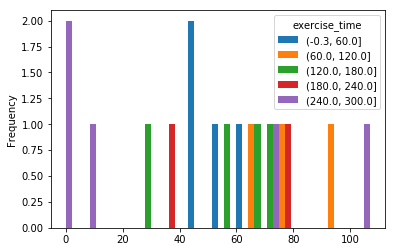

In [158]:
weight_and_exercise.plot.hist(bins=50);
# so this isn't what we're looking for, will continue to try out methods to
# get accurate visulization of data that conclusions can be drawn from

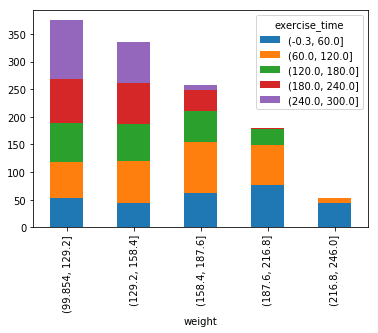

In [162]:
weight_and_exercise.plot(kind='bar', stacked=True, legend=True);

# of all the visulizations I've tried so far, this seems to be the the most 
# conclusive one


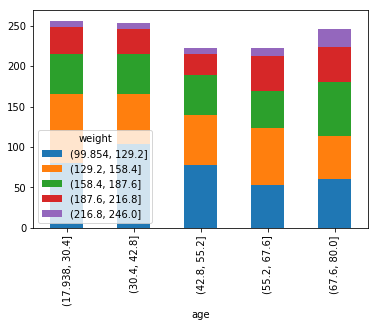

In [163]:
age_and_weight.plot(kind='bar', stacked=True, legend=True);

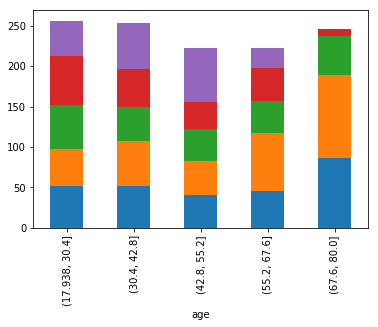

In [161]:
age_and_exercise.plot(kind='bar', stacked=True, legend=False);

### Assignment questions

After you've worked on some code, answer the following questions in this text block:

1.  What are the variable types in the data?
2.  What are the relationships between the variables?
3.  Which relationships are "real", and which spurious(confounding)?

Answers:

1. Each variable: weight, age, and exercise time are all continuous. But they do have upper thresholds, no one in the data set is over 80, none weighed more than 246, and none exercised more than 300 minutes.

2. Just intuitively thinking, there would be quite a few conclusions one could draw from the names of the variables before ever running any of this analysis. From this actual data itself and with the tests I've run thus far, the most conclusive relationship between variables was between weight and amount of time exercising. This is age old knowledge, and could have been assumed even without any testing, however it stands out of this data set as a very prominent conclusion you can draw. The conclusion to draw, the more exercise you do, the less likely you are to carry higher levels of bodyfat. 

Other conclusions to draw, a certain age range: 18 to 55 were most likely to do extreme amounts of exercise(150 minutes or higher). Whereas people in this data set older than 55 were not as likely to partake in those higher levels of exercise. There are multiple conclusions to be drawn, one is:  beyond a certain age as people get older and their bodies start to perform less optimally, large amounts of exercise become difficult to do and difficult to recover from, therefore making them impractical. 

3. One relationship that I had a preconcieved notion of: that the older people get they're typically going to weigh less; turned out to not be true in this data set and analysis. In this data set, the largest percentage of people waying at the upper end of the weight range(approaching 246) were also people in the highest age range(68-80).


## Stretch goals and resources

Following are *optional* things for you to take a look at. Focus on the above assignment first, and make sure to commit and push your changes to GitHub.

- [Spurious Correlations](http://tylervigen.com/spurious-correlations)
- [NIH on controlling for confounding variables](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4017459/)

Stretch goals:

- Produce your own plot inspired by the Spurious Correlation visualizations (and consider writing a blog post about it - both the content and how you made it)
- Pick one of the techniques that NIH highlights for confounding variables - we'll be going into many of them later, but see if you can find which Python modules may help (hint - check scikit-learn)